In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import chardet
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

import seaborn as sns
color=sns.color_palette()

In [ ]:
census = pd.read_csv('../data/denver_census_tract_data.csv')

In [ ]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Columns: 112 entries, ct_key to built 2000-2009
dtypes: float64(103), int64(9)
memory usage: 660.8 KB


In [ ]:
df = pd.read_csv('../data/denver_augmented_clean.csv')

df["list_date"] = pd.to_datetime(df["list_date"])
df["sale_date"] = pd.to_datetime(df["sale_date"])

In [ ]:
df

,property_id,zipcode,fips,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,...,median_rental_price,pop_density,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool
0,138560546,80002,8059.0,1687.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
1,138555680,80002,8059.0,2220.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
2,138574571,80002,8059.0,2127.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
3,138574571,80002,8059.0,2127.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
4,138567704,80002,8059.0,1549.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308693,517468281,80602,8001.0,1472.0,CONDO,False,False,False,False,False,...,1923.0,3147.582231,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667
308694,661797786,80602,8001.0,1440.0,SINGLE,False,False,False,False,True,...,1220.0,1307.892557,57.323550,69.171547,56.438041,12.436416,1.000000,0.055944,0.016084,0.053147
308695,551997597,80603,8123.0,3051.0,SINGLE,False,False,False,False,False,...,1220.0,1307.892557,57.323550,69.171547,56.438041,12.436416,1.000000,0.055944,0.016084,0.053147
308696,550970025,80603,8123.0,2900.0,SINGLE,False,False,False,False,False,...,1220.0,1307.892557,57.323550,69.171547,56.438041,12.436416,1.000000,0.055944,0.016084,0.053147


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308698 entries, 0 to 308697
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   property_id                      308698 non-null  int64         
 1   zipcode                          308698 non-null  int64         
 2   fips                             308698 non-null  float64       
 3   sqft                             308698 non-null  float64       
 4   property_type                    308698 non-null  object        
 5   has_central_air                  308698 non-null  bool          
 6   has_jacuzzi                      308698 non-null  bool          
 7   has_pool                         308698 non-null  bool          
 8   has_solar                        308698 non-null  bool          
 9   has_garage                       308698 non-null  bool          
 10  list_date                        308698 non-

In [ ]:
agg = df['property_id'].groupby([df.list_date.dt.year, df.list_date.dt.week]).agg(count='count')

In [ ]:
agg

count
list_date list_date       
2016      9           2139
          10          2479
          11          2449
          12          1874
          13          2841
...                    ...
2020      40           343
          41           184
          42            76
          43            38
          44            51

[244 rows x 1 columns]

In [ ]:
unstack = agg.unstack(level=0)
unstack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 52
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (count, 2016)  44 non-null     float64
 1   (count, 2017)  52 non-null     float64
 2   (count, 2018)  52 non-null     float64
 3   (count, 2019)  52 non-null     float64
 4   (count, 2020)  44 non-null     float64
dtypes: float64(5)
memory usage: 2.4 KB


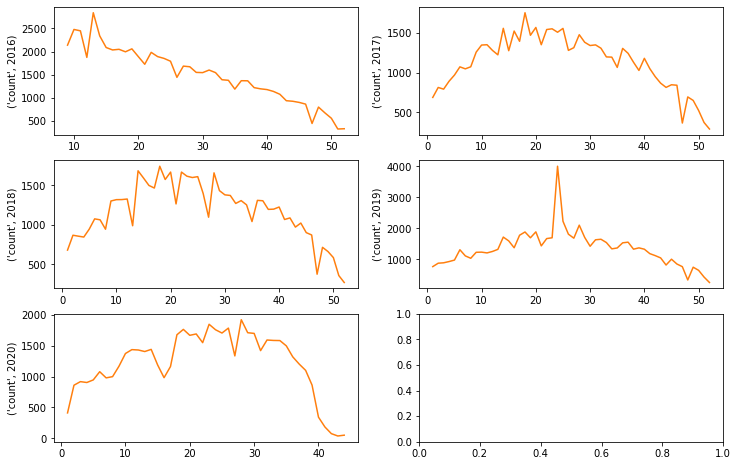

In [ ]:
f, ax = plt.subplots(3,2)
f.set_size_inches(12, 8, forward=True)

sns.lineplot(y=unstack.iloc[:,0], x=[x for x in range(1,53)], color=color[1], ax=ax[0,0])
sns.lineplot(y=unstack.iloc[:,1], x=[x for x in range(1,53)], color=color[1], ax=ax[0,1])
sns.lineplot(y=unstack.iloc[:,2], x=[x for x in range(1,53)], color=color[1], ax=ax[1,0])
sns.lineplot(y=unstack.iloc[:,3], x=[x for x in range(1,53)], color=color[1], ax=ax[1,1])
sns.lineplot(y=unstack.iloc[:,4], x=[x for x in range(1,53)], color=color[1], ax=ax[2,0])

plt.show()

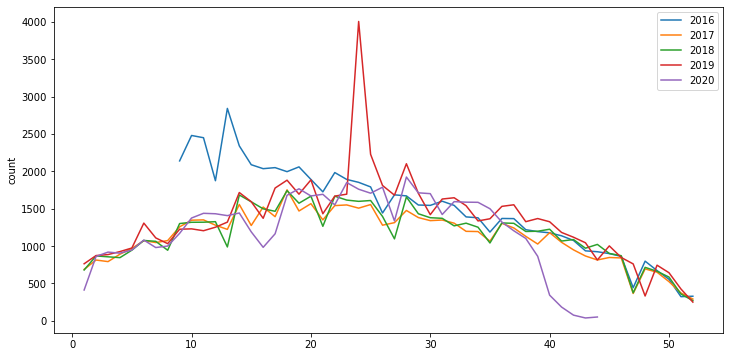

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(y=unstack.iloc[:,0], x=[x for x in range(1,53)], label='2016')
sns.lineplot(y=unstack.iloc[:,1], x=[x for x in range(1,53)], label='2017')
sns.lineplot(y=unstack.iloc[:,2], x=[x for x in range(1,53)], label='2018')
sns.lineplot(y=unstack.iloc[:,3], x=[x for x in range(1,53)], label='2019')
sns.lineplot(y=unstack.iloc[:,4], x=[x for x in range(1,53)], label='2020')

plt.ylabel('count')
plt.legend()
plt.show()

In [ ]:
quarter = (df['list_date'] >= pd.to_datetime('2019-4-1')) & (df['list_date'] < pd.to_datetime('2019-7-1'))

In [ ]:
small_df = df[quarter].copy()
small_df['list_date'] = pd.to_datetime(small_df['list_date'])
small_df['sale_date'] = pd.to_datetime(small_df['sale_date'])

In [ ]:
june = (small_df['list_date'] >= pd.to_datetime('2019-6-1')) & (small_df['list_date'] < pd.to_datetime('2019-7-1'))

In [ ]:
small_df['y'] = 0

In [ ]:
small_df.loc[june, 'y'] = 1

In [ ]:
df

,property_id,zipcode,fips,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,...,median_rental_price,pop_density,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool
0,138560546,80002,8059.0,1687.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
1,138555680,80002,8059.0,2220.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
2,138574571,80002,8059.0,2127.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
3,138574571,80002,8059.0,2127.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
4,138567704,80002,8059.0,1549.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308693,517468281,80602,8001.0,1472.0,CONDO,False,False,False,False,False,...,1923.0,3147.582231,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667
308694,661797786,80602,8001.0,1440.0,SINGLE,False,False,False,False,True,...,1220.0,1307.892557,57.323550,69.171547,56.438041,12.436416,1.000000,0.055944,0.016084,0.053147
308695,551997597,80603,8123.0,3051.0,SINGLE,False,False,False,False,False,...,1220.0,1307.892557,57.323550,69.171547,56.438041,12.436416,1.000000,0.055944,0.016084,0.053147
308696,550970025,80603,8123.0,2900.0,SINGLE,False,False,False,False,False,...,1220.0,1307.892557,57.323550,69.171547,56.438041,12.436416,1.000000,0.055944,0.016084,0.053147


In [ ]:
print('Values equal 1: {}'.format(small_df['property_id'][small_df['y']== 1].count()))
print('Values equal 0: {}'.format(small_df['property_id'][small_df['y']== 0].count()))   

Values equal 1: 9892
Values equal 0: 14859


In [ ]:
dataset = small_df.drop(columns=['property_id', 'list_date', 'sale_date'])

In [ ]:
dataset

,zipcode,fips,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,sale_price_per_sqft,...,pop_density,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool,y
33,80002,8059.0,2527.0,SINGLE,False,False,False,False,False,230.114761,...,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,0
56,80002,8059.0,2825.0,SINGLE,False,False,False,False,False,247.752212,...,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,1
58,80002,8059.0,1236.0,SINGLE,True,False,False,False,False,485.355987,...,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,1
61,80002,48215.0,2780.0,SINGLE,True,False,False,False,False,54.496403,...,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,1
69,80002,8059.0,1111.0,SINGLE,False,False,False,False,False,149.414941,...,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308659,80602,8001.0,1614.0,SINGLE,False,False,False,False,False,255.576208,...,3147.582231,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667,1
308662,80602,8001.0,3155.0,SINGLE,False,False,False,False,False,147.638669,...,3147.582231,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667,0
308686,80602,8001.0,1446.0,MULTI_FAMILY,False,False,False,False,False,202.973721,...,3147.582231,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667,1
308691,80602,8001.0,1672.0,CONDO,False,False,False,False,False,197.966507,...,3147.582231,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667,0


In [ ]:
dataset['property_type'].unique()

array(['SINGLE', 'CONDO', 'MULTI_FAMILY', 'LAND', 'OTHER', 'TOWNHOUSE'],
      dtype=object)

In [ ]:
mapping = {k: v for v, k in enumerate(dataset.property_type.unique())}
mapping

{'SINGLE': 0,
 'CONDO': 1,
 'MULTI_FAMILY': 2,
 'LAND': 3,
 'OTHER': 4,
 'TOWNHOUSE': 5}

In [ ]:
dataset['property_type_code'] = dataset['property_type'].map(mapping)

In [ ]:
dataset

,zipcode,fips,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,sale_price_per_sqft,...,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool,y,property_type_code
33,80002,8059.0,2527.0,SINGLE,False,False,False,False,False,230.114761,...,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,0,0
56,80002,8059.0,2825.0,SINGLE,False,False,False,False,False,247.752212,...,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,1,0
58,80002,8059.0,1236.0,SINGLE,True,False,False,False,False,485.355987,...,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,1,0
61,80002,48215.0,2780.0,SINGLE,True,False,False,False,False,54.496403,...,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,1,0
69,80002,8059.0,1111.0,SINGLE,False,False,False,False,False,149.414941,...,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308659,80602,8001.0,1614.0,SINGLE,False,False,False,False,False,255.576208,...,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667,1,0
308662,80602,8001.0,3155.0,SINGLE,False,False,False,False,False,147.638669,...,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667,0,0
308686,80602,8001.0,1446.0,MULTI_FAMILY,False,False,False,False,False,202.973721,...,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667,1,2
308691,80602,8001.0,1672.0,CONDO,False,False,False,False,False,197.966507,...,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667,0,1


In [ ]:
y = dataset['y'].copy()

In [ ]:
X = dataset.drop(columns=['y', 'property_type', 'zipcode'])

In [ ]:
X

,fips,sqft,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,sale_price_per_sqft,farm_score,median_rental_price,pop_density,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool,property_type_code
33,8059.0,2527.0,False,False,False,False,False,230.114761,100.0,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,0
56,8059.0,2825.0,False,False,False,False,False,247.752212,100.0,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,0
58,8059.0,1236.0,True,False,False,False,False,485.355987,100.0,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,0
61,48215.0,2780.0,True,False,False,False,False,54.496403,100.0,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,0
69,8059.0,1111.0,False,False,False,False,False,149.414941,100.0,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308659,8001.0,1614.0,False,False,False,False,False,255.576208,100.0,1923.0,3147.582231,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667,0
308662,8001.0,3155.0,False,False,False,False,False,147.638669,100.0,1923.0,3147.582231,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667,0
308686,8001.0,1446.0,False,False,False,False,False,202.973721,100.0,1923.0,3147.582231,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667,2
308691,8001.0,1672.0,False,False,False,False,False,197.966507,100.0,1923.0,3147.582231,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
X_test

,fips,sqft,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,sale_price_per_sqft,farm_score,median_rental_price,pop_density,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool,property_type_code
43524,8031.0,1626.0,False,False,False,False,False,193.726937,100.0,1957.0,6131.855654,100.000000,30.513624,20.230542,68.004344,6.734489,0.013176,0.112997,0.029477,1
119815,8005.0,3495.0,False,False,False,False,False,374.821173,100.0,2490.0,996.098209,100.000000,10.834777,49.251430,83.161484,0.000000,0.013398,0.000000,0.040193,0
102746,8035.0,3253.0,False,False,False,False,False,159.852444,100.0,3421.0,27.116570,100.000000,33.890126,49.823765,81.640958,0.873362,0.003443,0.000000,0.068095,0
248206,8031.0,2574.0,True,False,False,False,False,167.016317,100.0,2883.0,3391.752686,17.870029,89.108856,49.904696,44.991614,3.858435,0.000000,0.020390,0.173936,0
32834,8005.0,1040.0,False,False,False,False,False,168.269231,100.0,1624.0,7456.053481,33.842786,92.698452,46.901521,40.226567,8.885730,0.000000,0.062675,0.118491,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219724,8059.0,2356.0,False,False,False,False,False,292.869270,100.0,2150.0,837.329304,7.556655,34.977591,22.943187,92.272265,4.731488,0.000000,0.015113,0.074127,0
10890,8059.0,4202.0,False,False,False,False,False,246.311280,100.0,2544.0,3090.688664,100.000000,45.196459,50.859957,51.662130,1.053741,0.010115,0.022989,0.066667,0
133985,8031.0,2159.0,False,False,False,False,False,211.857341,100.0,1954.0,6180.961659,20.478102,66.608925,36.862304,56.194836,7.006681,0.005270,0.035885,0.073777,0
11464,8059.0,960.0,False,False,False,False,False,390.625000,100.0,2539.0,5237.577216,100.000000,68.968077,49.422874,11.490555,1.008878,0.032314,0.021313,0.017188,0


In [ ]:
y_test

43524     0
119815    0
102746    0
248206    1
32834     0
         ..
219724    0
10890     0
133985    1
11464     0
56420     0
Name: y, Length: 8168, dtype: int64

In [ ]:
logit_reg = LogisticRegression().fit(X_train, y_train)

/Users/namluu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Train set accuracy: {}'.format(logit_reg.score(X_train, y_train)))
print('Test set accuracy: {}'.format(logit_reg.score(X_test, y_test)))

Train set accuracy: 0.6204546825061811
Test set accuracy: 0.6079823702252694


In [ ]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

In [ ]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=250, random_state=0)

In [ ]:
print('Train set accuracy: {}'.format(forest.score(X_train, y_train)))
print('Test set accuracy: {}'.format(forest.score(X_test, y_test)))

Train set accuracy: 0.9988542483265995
Test set accuracy: 0.6199804113614104


## Listing duration

In [ ]:
df['listing_duration'] = df['sale_date'] - df['list_date']

In [ ]:
df

,property_id,zipcode,fips,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,...,pop_density,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool,listing_duration
0,138560546,80002,8059.0,1687.0,SINGLE,False,False,False,False,False,...,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,53 days
1,138555680,80002,8059.0,2220.0,SINGLE,False,False,False,False,False,...,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,35 days
2,138574571,80002,8059.0,2127.0,SINGLE,False,False,False,False,False,...,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,33 days
3,138574571,80002,8059.0,2127.0,SINGLE,False,False,False,False,False,...,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,42 days
4,138567704,80002,8059.0,1549.0,SINGLE,False,False,False,False,False,...,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,389 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308693,517468281,80602,8001.0,1472.0,CONDO,False,False,False,False,False,...,3147.582231,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667,41 days
308694,661797786,80602,8001.0,1440.0,SINGLE,False,False,False,False,True,...,1307.892557,57.323550,69.171547,56.438041,12.436416,1.000000,0.055944,0.016084,0.053147,332 days
308695,551997597,80603,8123.0,3051.0,SINGLE,False,False,False,False,False,...,1307.892557,57.323550,69.171547,56.438041,12.436416,1.000000,0.055944,0.016084,0.053147,326 days
308696,550970025,80603,8123.0,2900.0,SINGLE,False,False,False,False,False,...,1307.892557,57.323550,69.171547,56.438041,12.436416,1.000000,0.055944,0.016084,0.053147,165 days


In [ ]:
X = df.drop(columns=['zipcode', 'list_date', 'sale_date'])
X['property_type_code'] = X['property_type'].map(mapping)
X = X.drop(columns=['property_type'])

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308698 entries, 0 to 308697
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype          
---  ------                           --------------   -----          
 0   property_id                      308698 non-null  int64          
 1   fips                             308698 non-null  float64        
 2   sqft                             308698 non-null  float64        
 3   has_central_air                  308698 non-null  bool           
 4   has_jacuzzi                      308698 non-null  bool           
 5   has_pool                         308698 non-null  bool           
 6   has_solar                        308698 non-null  bool           
 7   has_garage                       308698 non-null  bool           
 8   sale_price_per_sqft              308698 non-null  float64        
 9   farm_score                       308698 non-null  float64        
 10  median_rental_price             

In [ ]:
y = X['listing_duration'].dt.days.astype('int16')
X = X.drop(columns=['listing_duration'])

In [ ]:
X.head()

,property_id,fips,sqft,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,sale_price_per_sqft,farm_score,...,pop_density,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool,property_type_code
0,138560546,8059.0,1687.0,False,False,False,False,False,207.468880,100.0,...,3317.321845,100.0,66.918255,43.566921,67.42143,2.764467,0.015244,0.016463,0.080793,0
1,138555680,8059.0,2220.0,False,False,False,False,False,191.441441,100.0,...,3317.321845,100.0,66.918255,43.566921,67.42143,2.764467,0.015244,0.016463,0.080793,0
2,138574571,8059.0,2127.0,False,False,False,False,False,217.207334,100.0,...,3317.321845,100.0,66.918255,43.566921,67.42143,2.764467,0.015244,0.016463,0.080793,0
3,138574571,8059.0,2127.0,False,False,False,False,False,258.110014,100.0,...,3317.321845,100.0,66.918255,43.566921,67.42143,2.764467,0.015244,0.016463,0.080793,0
4,138567704,8059.0,1549.0,False,False,False,False,False,301.355713,100.0,...,3317.321845,100.0,66.918255,43.566921,67.42143,2.764467,0.015244,0.016463,0.080793,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
linear_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
print('Train set R2: {}'.format(linear_reg.score(X_train, y_train)))
print('Test set R2: {}'.format(linear_reg.score(X_test, y_test)))

Train set R2: 0.07097096192080699
Test set R2: 0.05541632795613238


In [ ]:
df['listing_duration']

0         53 days
1         35 days
2         33 days
3         42 days
4        389 days
           ...   
308693    41 days
308694   332 days
308695   326 days
308696   165 days
308697    47 days
Name: listing_duration, Length: 308698, dtype: timedelta64[ns]

In [ ]:
df['duration'] = df['listing_duration'].dt.days.astype('int16')

In [ ]:
durations = df['duration']

In [ ]:
small_dr = durations[durations < 500]

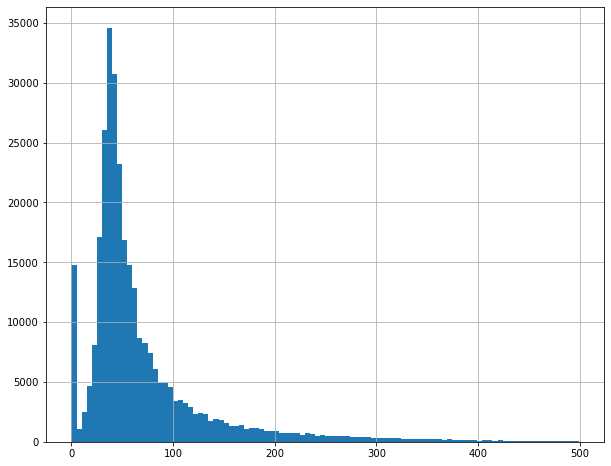

In [ ]:
small_dr.hist(bins=100, figsize=(10,8))

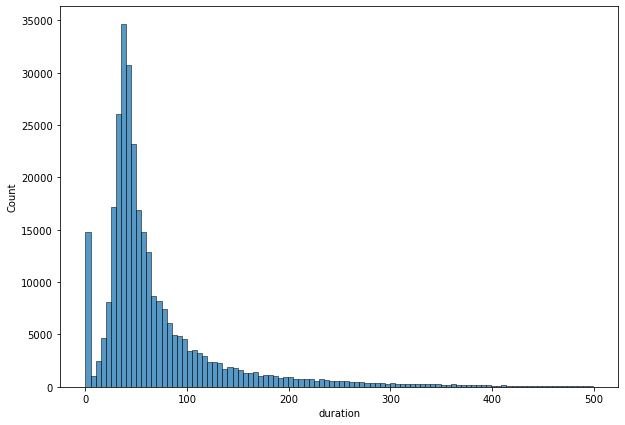

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(small_dr, bins=100)

In [ ]:
df

,zipcode,fips,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,list_date,...,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool,listing_duration,duration
0,80002,8059.0,3047.0,SINGLE,True,False,True,False,True,2020-09-24,...,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,39 days,39
1,80002,8059.0,4382.0,SINGLE,True,False,False,False,True,2020-09-24,...,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,35 days,35
2,80002,8059.0,2654.0,SINGLE,False,False,False,False,True,2020-09-24,...,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,25 days,25
3,80002,8059.0,2265.0,SINGLE,False,False,False,False,False,2020-09-24,...,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,34 days,34
4,80002,8059.0,1597.0,SINGLE,False,False,False,False,True,2020-09-15,...,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,43 days,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86782,80643,8123.0,640.0,SINGLE,False,False,False,False,True,2018-12-28,...,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537,119 days,119
86783,80643,8123.0,2280.0,SINGLE,True,False,False,False,False,2020-03-05,...,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537,134 days,134
86784,80643,8123.0,1728.0,SINGLE,True,False,False,False,True,2019-12-22,...,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537,103 days,103
86785,80643,8123.0,2527.0,SINGLE,True,False,False,False,True,2018-01-12,...,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537,654 days,654


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c850c61-d934-4c85-b16d-3cb283df0c84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>